<a href="https://colab.research.google.com/github/timkorn2606-star/Python-_-_-_2/blob/main/HR_analyse_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___________________________Задание 1:___________________________


                             mean  median    mode    min    max        std
satisfaction_level       0.612834    0.64    0.10   0.09    1.0   0.248631
last_evaluation          0.716102    0.72    0.55   0.36    1.0   0.171169
number_project           3.803054    4.00    4.00   2.00    7.0   1.232592
average_montly_hours   201.050337  200.00  135.00  96.00  310.0  49.943099
time_spend_company       3.498233    3.00    3.00   2.00   10.0   1.460136
Work_accident            0.144610    0.00    0.00   0.00    1.0   0.351719
left                     0.238083    0.00    0.00   0.00    1.0   0.425924
promotion_last_5years    0.021268    0.00    0.00   0.00    1.0   0.144281


___________________________Задание 2:___________________________




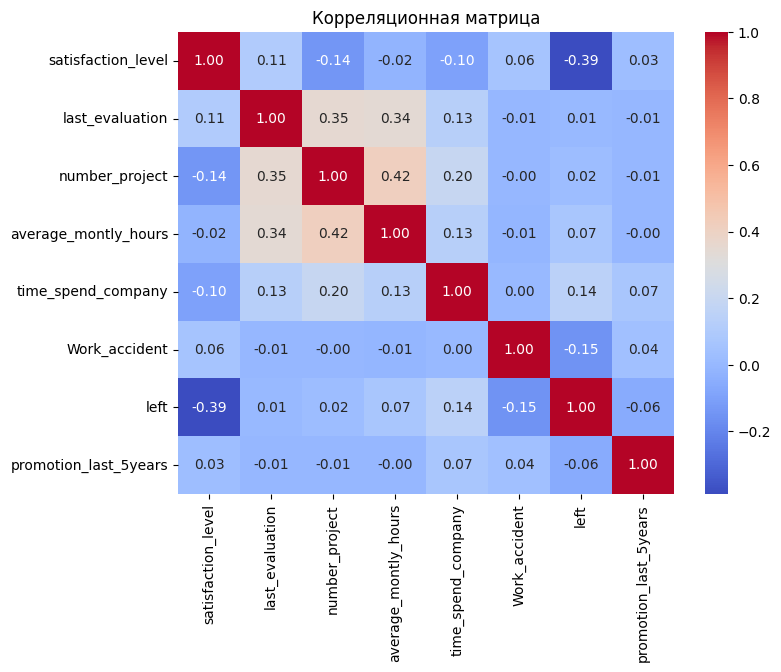

Наиболее скоррелированная пара:
average_montly_hours и number_project: 0.417


Наименее скоррелированная пара:
Work_accident и time_spend_company: 0.002


___________________________Задание 3:___________________________




Количество сотрудников в каждом департаменте:

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


___________________________Задание 4:___________________________


Распределение сотрудников по зарплатам:
salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


Распределение сотрудников по зарплатам в каждом департаменте:
salary       high   low  medium
department                     
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80

In [52]:
from pandas import *
from matplotlib.pyplot import *
import seaborn as sns
from math import *
from scipy.stats import *
from sklearn.model_selection import *
from sklearn.discriminant_analysis import *
from sklearn.metrics import *

df = pd.read_csv("HR.csv")


# ___________________________Задание 1:___________________________

print("___________________________Задание 1:___________________________")
print()
print()

stats = {
    "mean": df.mean(numeric_only=True),
    "median": df.median(numeric_only=True),
    "mode": df.mode(numeric_only=True).iloc[0],
    "min": df.min(numeric_only=True),
    "max": df.max(numeric_only=True),
    "std": df.std(numeric_only=True)
}
summary = pd.DataFrame(stats)
print(summary)
print()
print()


# ___________________________Задание 2:___________________________

print("___________________________Задание 2:___________________________")
print()
print()

corr_matrix = df.corr(numeric_only=True)

# Визуализация тепловой карты
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

pairs = corr_matrix.unstack()
pairs = pairs[pairs.index.get_level_values(0) < pairs.index.get_level_values(1)]

# Наиболее положительная корреляция
most_cor = pairs.idxmax()
val_max  = pairs.loc[most_cor]

# Наименьшая корреляция (по модулю)
least_cor = pairs.abs().idxmin()
val_min  = pairs.loc[least_cor]

print("Наиболее скоррелированная пара:")
print(f"{most_cor[0]} и {most_cor[1]}: {val_max:.3f}")
print()

print("\nНаименее скоррелированная пара:")
print(f"{least_cor[0]} и {least_cor[1]}: {val_min:.3f}")
print()
print()


# ___________________________Задание 3:___________________________

print("___________________________Задание 3:___________________________")
print()
print()

dept_counts = df['department'].value_counts()
print()
print()
print("Количество сотрудников в каждом департаменте:")
print()
print(dept_counts)
print()
print()


# ___________________________Задание 4:___________________________

print("___________________________Задание 4:___________________________")
print()
print()

salary_counts = df['salary'].value_counts()

print("Распределение сотрудников по зарплатам:")
print(salary_counts)
print()
print()
dept_salary_counts = df.groupby(["department", "salary"]).size().unstack(fill_value=0)

print("Распределение сотрудников по зарплатам в каждом департаменте:")
print(dept_salary_counts)
print()
print()

high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']


# ___________________________Задание 5:___________________________

print("___________________________Задание 5:___________________________")
print()
print()

# Проверка средних значений
high_avg= high_salary_hours.mean()
low_avg = low_salary_hours.mean()
high = df[df["salary"] == "high"]["average_montly_hours"]
low  = df[df["salary"] == "low"]["average_montly_hours"]

n_high = len(high)
n_low = len(low)

s_high = high.std()
s_low  = low.std()

se=sqrt(s_high**2/n_high + s_low**2/n_low)

t_value=(high_avg-low_avg)/se
dfr=(s_high**2/n_high + s_low**2/n_low)**2/((s_high**2/n_high)**2/(n_high-1) + (s_low**2/n_low)**2/(n_low-1))

p_value=1-t.cdf(t_value, dfr)
print("Значение p_value",p_value)
print()
print()
#p_value>>0.05 => Нет оснований отвергнуть нулевую гипотезу на уровне значимости 5%
#=>недостаточно оснований, чтобы доказать, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.


# ___________________________Задание 6:___________________________

print("___________________________Задание 6:___________________________")
print()
print()

result = df.groupby("left").agg({
    "promotion_last_5years": "mean",   # доля (среднее по 0/1)
    "satisfaction_level": "mean",      # среднее удовлетворённости
    "number_project": "mean"           # среднее число проектов
})

# Переименуем столбцы для наглядности
result = result.rename(columns={
    "promotion_last_5years": "Доля сотрудников с повышением",
    "satisfaction_level": "Средняя удовлетворённость сотрудника",
    "number_project": "Среднее число проектов"
})
result = result.rename(index={0: "Не уволился", 1: "Уволился"})
result.index.name = None
print(result)
print()
print()


# ___________________________Задание 7:___________________________

print("___________________________Задание 7:___________________________")
print()
print()

# Отбрасываем категориальные переменные 'department' и 'salary'
X = df.drop(["left", "department", "salary"], axis=1)

# Целевая переменная — увольнение
y = df["left"]

# Разделение на обучающую и тестовую выборки (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
lda = LinearDiscriminantAnalysis()

# Обучаем модель на train-данных
lda.fit(X_train, y_train)

# Делаем предсказания на test-данных
y_pred = lda.predict(X_test)

# Оценка точноти
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели (accuracy):", accuracy)

# По результатам Точность модели составляет приблизительно 0.77 или 77%. Т.е. модель правильно предсказывает исход (уволился / не уволился) примерно в 77% случаев.
